In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import hsv_to_rgb

In [43]:
nsamples = 100
gridline_width = 0.0
xmin, xmax = -1., 1.
ymin, ymax = -1., 1.
xs = np.linspace(xmin, xmax,nsamples)
ys = 1.j * np.linspace(ymin, ymax, nsamples)
xx, yy = np.meshgrid(xs,ys)
zz = (xx + yy)
f = lambda z: np.pi * np.cos(np.pi*z)/np.sin(np.pi*z) #(np.e**(2*np.pi*1.j*z)-1)/(1.j*z)
ww = f(zz)

In [44]:
def rgb_model(zs):
    H = np.angle(zs)/(2.*np.pi) + 0.5
    V = np.zeros((nsamples, nsamples))
    for i in range(zs.shape[0]):
        for j in range(zs.shape[1]):
            z = zs[i][j]
            x = np.real(z)
            y = np.imag(z)
            if (np.absolute(x) % 1. < gridline_width) or (np.absolute(y) % 1. < gridline_width):
                V[i][j] = 0.
            else:
                V[i][j] = 1. - 1./(1.+np.absolute(z))
    S = np.full(shape=(nsamples,nsamples), fill_value=1.)
    return hsv_to_rgb(np.dstack((H,S,V)))

In [45]:
rgb_id = rgb_model(zz)
rgb_f = rgb_model(ww)

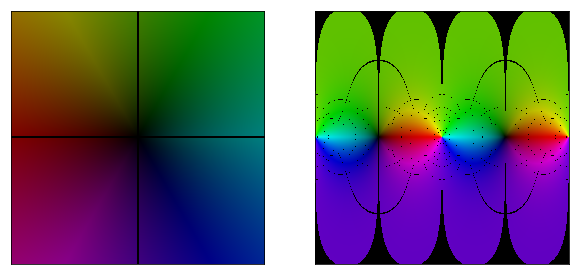

In [46]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(rgb_id)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.subplot(122)
plt.imshow(rgb_f)
plt.gca().invert_yaxis() #make CCW orientation positive
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()